In [27]:

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("train.csv")

#### Segment/ Cluster 1: Based on a person surviving (survival = 1) and different ticket class "pclass" (3 clusters which segments all survivors based on their ticket class)

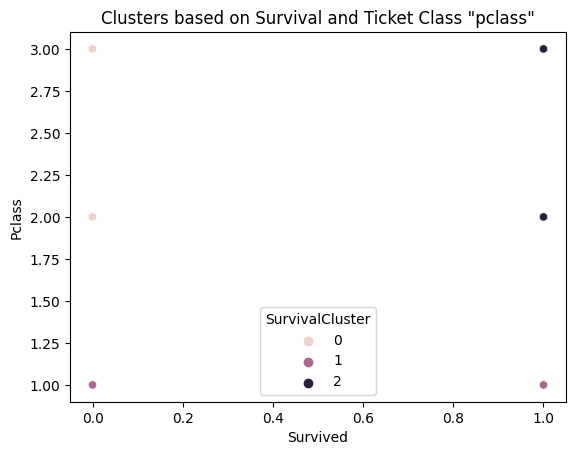

In [29]:
features_for_survival_cluster = df[['Survived', 'Pclass']]
kmeans_survival = KMeans(n_clusters=3, random_state=42)
df['SurvivalCluster'] = kmeans_survival.fit_predict(features_for_survival_cluster)

sns.scatterplot(x='Survived', y='Pclass', hue='SurvivalCluster', data=df)
plt.title('Clusters based on Survival and Ticket Class "pclass"')
plt.show()

### Segment/ Cluster 2: A person bought a second class ticket and is a female, based port "embarked" they embarked on (3 clusters for all female passengers who bought a second class ticket, based on the port of embarking)


In [57]:
female_second_class = df[(df['Sex'] == 'female') & (df['Pclass'] == 2)]

embarked_dummies = pd.get_dummies(female_second_class['Embarked'], prefix='Embarked')
female_second_class = pd.concat([female_second_class, embarked_dummies], axis=1)


num_clusters = 3
embarked_data = embarked_dummies
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(embarked_data)


female_second_class['Cluster'] = kmeans.labels_
print(female_second_class[['PassengerId', 'Pclass', 'Sex', 'Embarked', 'Cluster']])

     PassengerId  Pclass     Sex Embarked  Cluster
9             10       2  female        C        1
15            16       2  female        S        0
41            42       2  female        S        0
43            44       2  female        C        1
53            54       2  female        S        0
..           ...     ...     ...      ...      ...
854          855       2  female        S        0
865          866       2  female        S        0
866          867       2  female        C        1
874          875       2  female        C        1
880          881       2  female        S        0

[76 rows x 5 columns]


C:\Users\Hp\AppData\Local\Temp\ipykernel_18100\2930471010.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_second_class['Female_Second_Class_Embarked_Cluster'] = kmeans_female_second_class.fit_predict(features_for_female_second_class)


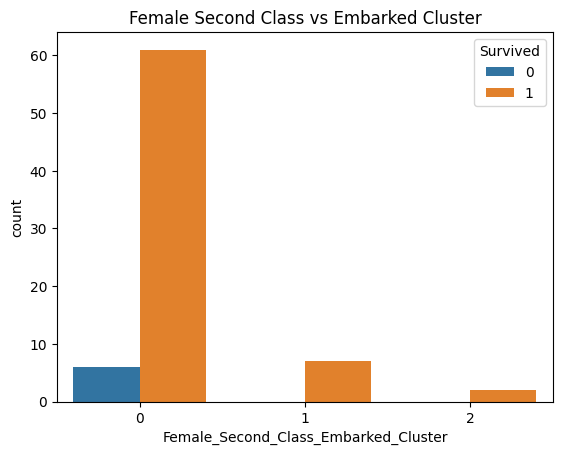

In [33]:
female_second_class = titanic_df[(titanic_df['Sex'] == 'female') & (titanic_df['Pclass'] == 2)]
features_for_female_second_class = pd.get_dummies(female_second_class[['Embarked']], drop_first=True)

kmeans_female_second_class = KMeans(n_clusters=3, random_state=42)
female_second_class['Female_Second_Class_Embarked_Cluster'] = kmeans_female_second_class.fit_predict(features_for_female_second_class)

sns.countplot(x='Female_Second_Class_Embarked_Cluster', hue='Survived', data=female_second_class)
plt.title('Female Second Class vs Embarked Cluster')
plt.show()

### Segment/ Cluster 3: Based on sex and age range of people cluster them into different groups age ranges (0-10: Kids, 10-20: Teens, 20-30: Young, 30-50: Middle Age, 50+: Senior)


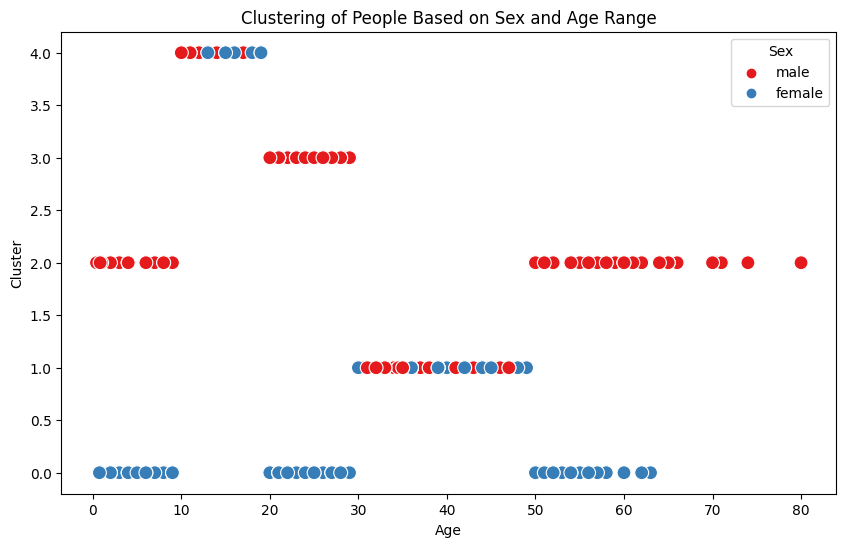

In [50]:
bins = [0, 10, 20, 30, 50, float('inf')]
labels = ['Kids', 'Teens', 'Young', 'Middle Age', 'Senior']
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

features_for_clustering = pd.get_dummies(df[['Sex', 'AgeRange']], drop_first=True)

num_clusters = 5 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_for_clustering)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Cluster', hue='Sex', data=df, palette='Set1', s=100)
plt.title('Clustering of People Based on Sex and Age Range')
plt.xlabel('Age')
plt.show()

### Heatmap to visualize the correlation matrix

C:\Users\Hp\AppData\Local\Temp\ipykernel_18100\80273347.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic_df.corr()


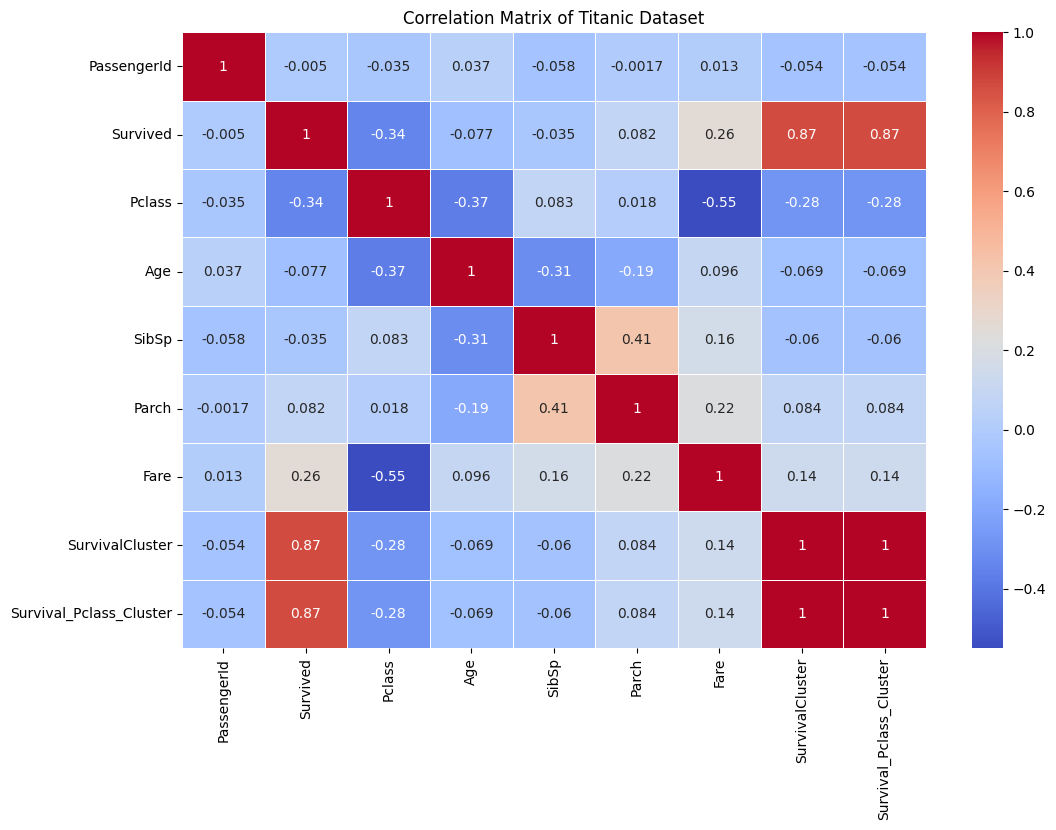

In [56]:
correlation_matrix = titanic_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

# Data Exploration & Preprocessing


In [32]:
titanic_df.info()
titanic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              714 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         889 non-null    object 
 12  SurvivalCluster  891 non-null    int32  
 13  AgeRange         891 non-null    int8   
dtypes: float64(2), int32(1), int64(5), int8(1), object(5)
memory usage: 88.0+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivalCluster,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,3


# Feature Engineering & Creating age ranges

In [51]:
age_bins = [0, 10, 20, 30, 50, 100]
age_labels = ["Kids", "Teens", "Young", "Middle Age", "Senior"]
titanic_df['AgeRange'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels, right=False)


# Segmentation/Clustering using KMeans


In [52]:
features_for_clustering = titanic_df[['Survived', 'Pclass']]
kmeans = KMeans(n_clusters=3, random_state=42)
titanic_df['Survival_Pclass_Cluster'] = kmeans.fit_predict(features_for_clustering)

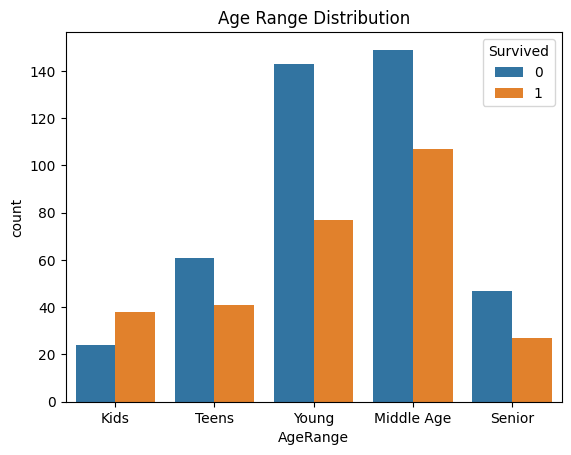

In [55]:

sns.countplot(x='AgeRange', hue='Survived', data=titanic_df)
plt.title('Age Range Distribution')
plt.show()
